## 一、数据分析
__author__ = 'hehuihui@caicloud.io'

In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### 读取数据

In [2]:
df = pd.read_csv('../data/000002.csv')
df.drop('code', axis=1, inplace=True)

#### a) 找出股票的历史最低价格、历史最高价格及其对应的日期

In [3]:
# 最低价格、最高价格
lowest_price = df['low'].min()
highest_price = df['high'].max()

# 最低价格索引、最高价格索引
lowest_index = df['low'].argmin()
highest_index = df['high'].argmax()
# 最低价格日期、最高价格日期
lowest_date = df['date'][lowest_index]
highest_date = df['date'][highest_index]

print(lowest_price, highest_price)
print(lowest_date, highest_date)

(5.5499999999999998, 30.219999999999999)
('2014-02-26', '2017-09-15')


#### b) 计算股票从第一天开始，之后每个交易日的累积涨跌幅度


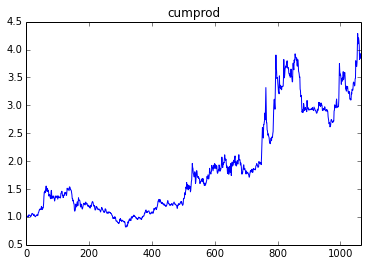

In [4]:
# 每个交易日的涨跌幅
df['pct_change'] = df['close'] / df['close'].shift(1).dropna(how='any')
# df['pct_change'] = 1 + df['close'].pct_change().dropna(how='any')

# 每个交易日的累积涨跌幅
pct_change_cumprod = df['pct_change'].cumprod()

pct_change_cumprod.plot(title='cumprod')

#### c) 统计从周一到周五，五个工作日的涨跌比例和平均涨跌幅度


In [5]:
# 计算每个日期是星期几（1-5：表示周一到周五）
df['weekday'] = pd.to_datetime(df['date'], format='%Y-%m-%d') \
                  .apply(lambda x: x.weekday() + 1)

In [6]:
def pct_change_gather(pct_changes):
    '''
    Args:
        pct_changes: pd.Series/List, 表示涨跌幅序列
    Returns:
        List: 结果序列，分别为 上涨天数、持平天数、下跌天数、上涨比例
    '''
    up_num = 0
    same_num = 0
    down_num = 0
    
    for pct in pct_changes:
        if pct > 1:
            up_num += 1
        elif pct == 1:
            same_num += 1
        else:
            down_num += 1

    total_num = up_num + same_num + down_num
    return (up_num, same_num, down_num, up_num / total_num)

- 五个工作日的涨跌天数统计、上涨比例

In [7]:
df.groupby('weekday')['pct_change'].agg([pct_change_gather])

,pct_change_gather
weekday,
1,"(95, 3, 111, 0.454545454545)"
2,"(112, 6, 99, 0.516129032258)"
3,"(104, 8, 104, 0.481481481481)"
4,"(94, 3, 115, 0.443396226415)"
5,"(109, 3, 100, 0.514150943396)"


- 五个工作日的平均涨跌幅

In [8]:
df.groupby('weekday')['pct_change'].agg(['mean'])

,mean
weekday,
1,0.997617
2,1.002166
3,1.002891
4,1.002251
5,1.003026


#### d) 找出当日开盘价相比上日收盘价，涨跌幅超过5%的所有日期


In [9]:
# 上涨幅度>5%的日期
up_index = df['pct_change'].apply(lambda x: x > 1.05)
up = df[['date', 'pct_change']][up_index]

# 下跌幅度>5%的日期
down_index = df['pct_change'].apply(lambda x: x < 0.95)
down = df[['date', 'pct_change']][down_index]

# 上涨幅度>5%或下跌幅度>5%的日期
index = df['pct_change'].apply(lambda x: x > 1.05 or x < 0.95)
data = df[['date', 'pct_change']][index]
#print data

#### e) 找出涨停或跌停的所有日期


In [10]:
# 问题：涨停和跌停的涨跌幅度是多少？
# 答案：并非+10%或-10%这么简单。需要分析涨跌幅最大的值，找出接近1.10或0.90的值
df.sort_values('pct_change', ascending=True)
df.sort_values('pct_change', ascending=False)

# 可以看出x > 1.099 or x < 0.909

,date,open,close,high,low,volume,pct_change,weekday
750,2015-12-01,13.914,15.390,15.390,13.858,3750163.0,1.100229,2
806,2016-08-31,21.934,24.110,24.110,21.857,2383125.0,1.100160,3
756,2015-12-09,16.662,18.147,18.147,16.532,3598519.0,1.100152,3
795,2016-08-16,25.638,26.663,26.663,25.251,3334780.0,1.100140,2
997,2017-06-26,24.120,25.609,25.609,23.742,1711182.0,1.100137,1
751,2015-12-02,15.483,16.931,16.931,15.353,6389886.0,1.100130,3
787,2016-08-04,17.176,19.023,19.023,17.021,3713465.0,1.100104,4
996,2017-06-23,21.122,23.278,23.278,21.083,1251186.0,1.100095,5
794,2016-08-15,22.679,24.236,24.236,22.640,3231106.0,1.100086,1
762,2015-12-17,18.917,20.616,20.616,18.889,2583392.0,1.100048,4


In [11]:
index = df['pct_change'].apply(lambda x: x > 1.099 or x < 0.909)
data = df[['date', 'pct_change']][index]

#### f) 找出成交量超过前5个交易日的平均成交量3倍的日期


In [49]:
# 计算前5个交易日的平均成交量 (注意需使用shift来移位)
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html
df['volume_mean_5'] = df['volume'].rolling(window=5).mean().shift(1)

# 找出成交量超过前5个交易日的平均成交量3倍的日期
index = df['volume'] > df['volume_mean_5'].apply(lambda x: x * 3)
df[['date', 'volume', 'volume_mean_5']][index].head()

,date,volume,volume_mean_5
18,2012-11-01,1317349.0,430463.6
39,2012-11-30,951928.0,309037.6
58,2013-01-22,4643326.0,743633.0
82,2013-03-04,3115455.0,979615.4
131,2013-05-17,1513641.0,478927.6



#### g) 按月对数据进行汇总，找出涨跌幅超过20%的月份

In [20]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

# 以每月为区间，取每月最后一个工作日汇总
period = 'BM'

# 设置datetime为索引
dt = pd.to_datetime(df['date'], format='%Y-%m-%d')
DF = df.set_index(dt.values)

# 默认取每月最后一个交易日的数据
dataframe = DF.resample(period).last()
dataframe.head(10)

,date,open,close,high,low,volume,pct_change,weekday,volume_mean_5
2012-10-31,2012-10-31,6.944,6.969,6.986,6.852,472225.0,1.002301,3.0,428217.4
2012-11-30,2012-11-30,7.061,7.329,7.472,7.045,951928.0,1.037955,5.0,309037.6
2012-12-31,2012-12-25,8.000,8.477,8.594,7.958,1664488.0,1.059625,2.0,920134.6
2013-01-31,2013-01-31,10.554,10.060,10.588,10.010,1513077.0,0.947894,4.0,1414862.4
2013-02-28,2013-02-28,9.650,10.052,10.127,9.650,1545465.0,1.060114,4.0,910399.4
2013-03-29,2013-03-29,9.164,9.013,9.197,8.971,418949.0,0.981701,5.0,782199.2
2013-04-30,2013-04-26,9.206,9.239,9.373,9.206,484443.0,1.004567,5.0,975579.6
2013-05-31,2013-05-31,10.478,10.197,10.563,10.172,613793.0,0.973182,5.0,767410.2
2013-06-28,2013-06-28,7.788,8.384,8.512,7.788,2349092.0,1.083624,5.0,1416304.4
2013-07-31,2013-07-31,8.342,8.103,8.597,8.078,1585069.0,1.028039,3.0,905637.4


In [21]:
# 每月开盘价，需取区间内第一天的数据
dataframe['open'] = DF['open'].resample(period).first()
# 每月收盘价，需取区间内最后一天的数据
dataframe['close'] = DF['close'].resample(period).last()
# 每月最高价，需取区间内最大的数据
dataframe['high'] = DF['high'].resample(period).max()
# 每月最低价，需取区间内最小的数据
dataframe['low'] = DF['low'].resample(period).min()
# 每月成交量，需取区间内数据之和
dataframe['volume'] = DF['volume'].resample(period).sum()

# 丢弃无关数据
dataframe.drop(['weekday', 'volume_mean_5', 'pct_change'], axis=1, inplace=True)

# 完成resample后，需重新设置索引，丢掉datetime索引，改用自然数索引
dataframe.reset_index(drop=True, inplace=True)

# print dataframe.head()

In [48]:
# 计算每月的涨跌幅
dataframe['pct_change'] = 1 + dataframe['close'].pct_change()

# 找出涨跌幅大于20%的月份
index = dataframe['pct_change'].apply(lambda x: x > 1.20 or x < 0.80)
dataframe.loc[index, :]

,date,open,close,high,low,volume,pct_change
17,2014-03-31,5.677,6.886,7.014,5.584,29173900.0,1.203846
26,2014-12-31,9.788,12.482,12.482,9.393,64994919.0,1.275235
38,2015-12-18,13.914,22.677,22.677,13.858,40239609.0,1.621175
45,2016-07-29,20.412,16.576,20.412,15.538,48615416.0,0.730961
46,2016-08-31,16.450,24.110,26.769,16.344,52997907.0,1.454513
50,2016-12-30,25.686,19.874,26.402,19.439,11005278.0,0.761689
